In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import collections
import pathlib
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow import keras

In [2]:
tfds.disable_progress_bar()

def plot_graphs(history, metric):   #define a function to plot the history graph with accuracy and loss
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
seed = 42

train_dataset = preprocessing.text_dataset_from_directory(
    'archive',
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [6]:
test_dataset = preprocessing.text_dataset_from_directory(
    'archive',
    validation_split=.2,
    subset='validation',
    seed=seed)

Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [7]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-500-with-normalization/2")


In [8]:
hub_layer = hub.KerasLayer(embed, input_shape=[], dtype=tf.string)


In [9]:
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True) # set callbacks

In [11]:
history = model.fit(train_dataset, epochs=50,
                    validation_data=test_dataset, 
                    validation_steps=5,
                    callbacks=earlystopping_cb)

Epoch 1/50
25/25 [==============================] - 5s 212ms/step - loss: 1.9421 - accuracy: 0.3938 - val_loss: 1.5925 - val_accuracy: 0.5813
Epoch 2/50
25/25 [==============================] - 3s 137ms/step - loss: 1.2815 - accuracy: 0.7437 - val_loss: 1.0818 - val_accuracy: 0.7750
Epoch 3/50
25/25 [==============================] - 5s 217ms/step - loss: 0.9200 - accuracy: 0.8250 - val_loss: 0.8420 - val_accuracy: 0.8687
Epoch 4/50
25/25 [==============================] - 3s 127ms/step - loss: 0.7209 - accuracy: 0.8512 - val_loss: 0.6843 - val_accuracy: 0.8625
Epoch 5/50
25/25 [==============================] - 3s 118ms/step - loss: 0.5831 - accuracy: 0.8825 - val_loss: 0.5486 - val_accuracy: 0.8938
Epoch 6/50
25/25 [==============================] - 3s 126ms/step - loss: 0.4859 - accuracy: 0.9125 - val_loss: 0.4815 - val_accuracy: 0.9250
Epoch 7/50
25/25 [==============================] - 3s 124ms/step - loss: 0.4222 - accuracy: 0.9237 - val_loss: 0.4295 - val_accuracy: 0.9375
Epoch 

In [12]:
test_loss, test_acc = model.evaluate(test_dataset) 

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

7/7 [==============================] - 0s 6ms/step - loss: 0.2059 - accuracy: 0.9400
Test Loss: 0.20587776601314545
Test Accuracy: 0.9399999976158142


(0.0, 2.0373060695827006)

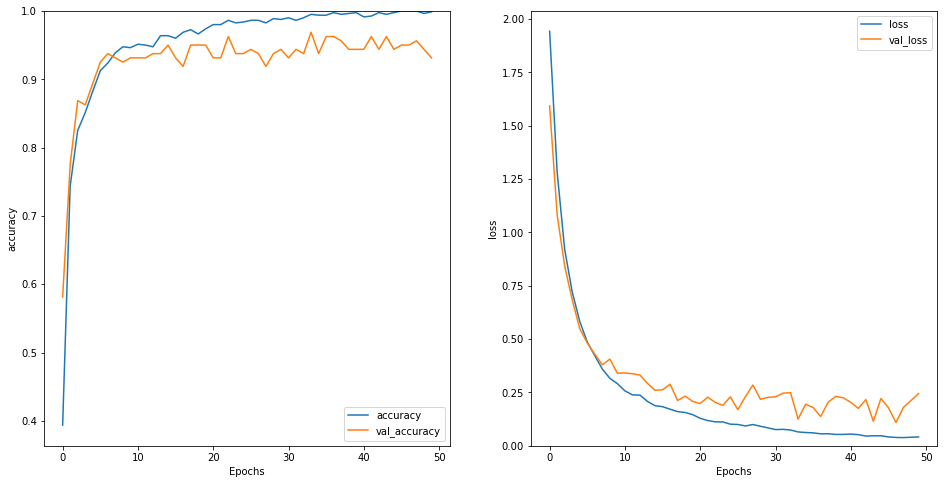

In [13]:
plt.figure(figsize=(16,8)) 
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)